In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = pd.read_excel("/content/Assignment-1_DataFinal.xlsx" , sheet_name="Sheet1")
scratches = data["Number of Scratches"]
scratch_lens = data["Total scratch length (in mm)"]

#### Q3 and Q4 Answers

**Q3**
Given the sample data, the expected number of scratches on a car produced on the
assembly line is ___

**Q4**
Given the sample data, the expected total scratch length (in mm) for a car produced on the
assembly line is ___

In [25]:
print(scratches.mean()  , scratch_lens.mean() , sep=" , ")

7.1 , 3.0021594481058655


#### Q5 Answer
Based on the descriptive statistics (and visualization) of the sample data, the total scratch
length can be assumed to have a ___


In [26]:
print(scratch_lens.skew() , scratch_lens.median() , scratch_lens.mean())

-0.11261174177498232 3.044170604765749 3.0021594481058655


## Distribution Fitting


In [27]:
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

from scipy.stats import uniform , norm , poisson
from scipy.stats import probplot

### Fitting of Length of Scratches


In [28]:
print(scratch_lens.mean() , scratch_lens.median()) # mean and median of length of scratches
print((scratch_lens.var()**(1/2)) / scratch_lens.mean()) #cv , coefficient of variation

3.0021594481058655 3.044170604765749
0.17010929138261632


- Mean and Median are similar to each other , so our guess would be to use normal random variables

- Coefficient of Variation here is less than 1 , so the possibility of lognormal and exponential distributions are removed.

- We now only have 1 distribution left as a viable option which is normal distribution.
Fitting Normal Distribution using qqplot and pplot we can see that it fits the distribution very well.



#### QQPlot

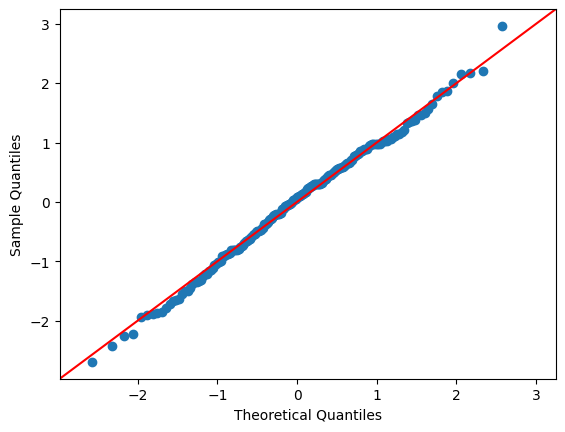

In [8]:
sm.qqplot(scratch_lens , norm , fit=True , line="45")
plt.show()


#### PPPlot

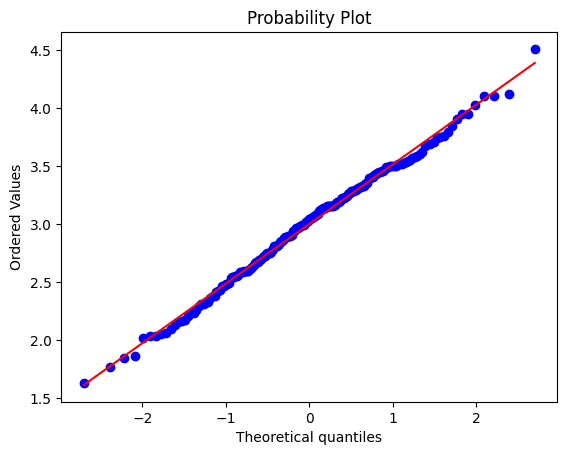

In [9]:
probplot(scratch_lens , dist="norm" ,fit=True, plot=plt)
plt.show()

### Fitting of Number of Scratches


In [10]:
print(scratches.describe())
print("variance  " , scratches.var())


count    200.000000
mean       7.100000
std        2.860228
min        1.000000
25%        5.000000
50%        7.000000
75%        9.000000
max       18.000000
Name: Number of Scratches, dtype: float64
variance   8.180904522613066


- We can see that the difference between mean and the variance of number of
scratches is not too large , which means  the possibility of the distribution being poission distribubtion is there.



#### QQPlot


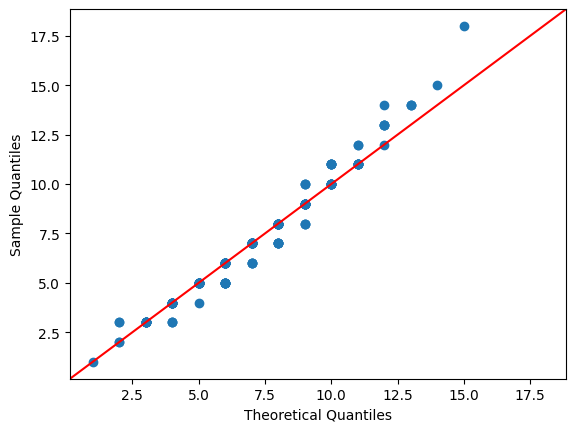

In [11]:
#plt.plot(scratches , poisson.pmf(scratches , scratches.mean()) , marker="o" , linestyle="")
sm.qqplot(scratches, poisson(scratches.mean()), line="45")
plt.show()


## Chi Square Test


In [12]:
from scipy.stats import chisquare , chi2 , chi2_contingency

### Number of Scratches Chi Square Test

In [37]:
scratches_bin_df = pd.DataFrame()
scratches_bin_df["Count"] = data.groupby("Number of Scratches")["Number of Scratches"].count()
# scratches_bin_df.rename(columns={"Number of Scratches":"Count"} , inplace=True)

In [41]:
scratches_bin_df["POISSON PMF"] = poisson.pmf(k = scratches_bin_df.index , mu = data["Number of Scratches"].mean())

last_poisson_value = scratches_bin_df.at[scratches_bin_df.index[-1] , "POISSON PMF"]
scratches_bin_df.at[scratches_bin_df.index[-1] , "POISSON PMF"] = 1 - (scratches_bin_df["POISSON PMF"].sum() - last_poisson_value)

scratches_bin_df["Expected Frequency"] = scratches_bin_df["POISSON PMF"] * len(scratches)
scratches_bin_df

,Count,POISSON PMF,Expected Frequency
Number of Scratches,,,
1,1,0.005858,1.171649
2,2,0.020797,4.159354
3,15,0.049219,9.843804
4,15,0.087364,17.472753
5,32,0.124057,24.811309
6,26,0.146800,29.360049
7,32,0.148897,29.779478
8,23,0.132146,26.429287
9,15,0.104249,20.849771


#### Q6 Answer


If you perform a chi-square goodness of fit test for the “Number of scratches” column,
what is the probability of observing exactly 4 defects?

In [44]:
print(scratches_bin_df.at[4,"POISSON PMF"])

0.08736376292317766


#### Q7 and Q8 Answer

**Q7**
If you perform a chi-square goodness of fit test for the “Number of scratches” column,
what is the value of the computed test statistic?

**Q8**
If you perform a chi-square goodness of fit test for the “Number of scratches” column,
what is the p-value for the test?

In [45]:
chisquare(scratches_bin_df["Count"] , scratches_bin_df["Expected Frequency"])

Power_divergenceResult(statistic=17.016461417808685, pvalue=0.31788129244487695)

### Scratch Length Chi Square Test


In [48]:
data['Bins'] = pd.cut(scratch_lens , bins=8)
scratch_lens_bin_df = pd.DataFrame()
scratch_lens_bin_df["Count"] = data.groupby("Bins").count()['CarID']
scratch_lens_bin_df

,Count
Bins,
"(1.626, 1.99]",4
"(1.99, 2.35]",19
"(2.35, 2.71]",34
"(2.71, 3.07]",49
"(3.07, 3.431]",51
"(3.431, 3.791]",33
"(3.791, 4.151]",9
"(4.151, 4.512]",1


In [52]:
mean = data["Total scratch length (in mm)"].mean()
std_dev = data["Total scratch length (in mm)"].std()
for index in scratch_lens_bin_df.index:
  lower = (index.left - mean)/std_dev
  upper = (index.right - mean)/std_dev
  lower_prob = norm.cdf(lower)
  upper_prob = norm.cdf(upper)
  final_prob = upper_prob - lower_prob
  scratch_lens_bin_df.at[index , "NORMAL PMF"] = final_prob

scratch_lens_bin_df

,Count,NORMAL PMF
Bins,,
"(1.626, 1.99]",4,0.020221
"(1.99, 2.35]",19,0.077057
"(2.35, 2.71]",34,0.182833
"(2.71, 3.07]",49,0.269207
"(3.07, 3.431]",51,0.246627
"(3.431, 3.791]",33,0.139316
"(3.791, 4.151]",9,0.048978
"(4.151, 4.512]",1,0.010682


In [54]:
last_normal_value = scratch_lens_bin_df.at[scratch_lens_bin_df.index[-1] , "NORMAL PMF"]
scratch_lens_bin_df.at[scratch_lens_bin_df.index[-1] , "NORMAL PMF"] = 1 - (scratch_lens_bin_df["NORMAL PMF"].sum() - last_normal_value)
scratch_lens_bin_df["Expected Frequency"] = scratch_lens_bin_df["NORMAL PMF"] * len(data)

scratch_lens_bin_df

,Count,NORMAL PMF,Expected Frequency
Bins,,,
"(1.626, 1.99]",4,0.020221,4.044202
"(1.99, 2.35]",19,0.077057,15.411343
"(2.35, 2.71]",34,0.182833,36.566544
"(2.71, 3.07]",49,0.269207,53.841322
"(3.07, 3.431]",51,0.246627,49.325435
"(3.431, 3.791]",33,0.139316,27.863265
"(3.791, 4.151]",9,0.048978,9.795646
"(4.151, 4.512]",1,0.015761,3.152242


#### Q9 Answer

If you perform a chi-square goodness of fit test for the “Total scratch length (in mm)”
column, what is the probability of observing a total scratch length less than or equal to
2.713856mm?


In [56]:
interval = pd.Interval(0,2.71 , closed="right")
prob = 0
for index in scratch_lens_bin_df.index:
  if interval.overlaps(index):
    prob += scratch_lens_bin_df.at[index , "NORMAL PMF"]

prob

0.2801104447145279

#### Q10 and Q11 Answer

**Q10**
If you perform a chi-square goodness of fit test for the “Total scratch length (in mm)”
column, what is the value of the computed test statistic?

**Q11**
If you perform a chi-square goodness of fit test for the “Total scratch length (in mm)”
column, what is the p-value for the test?

In [57]:
chisquare(scratch_lens_bin_df["Count"] , scratch_lens_bin_df["Expected Frequency"])

Power_divergenceResult(statistic=3.9895324252983446, pvalue=0.7809822794857972)

#### Q12 Answer
How many degrees of freedom are present in the chi-square goodness of test to determine
the distribution for the “Number of Scratches” column?

In [58]:
p = 1 #cuz we fitted this to normal
print(len(scratches_bin_df)-p-1)

14


## Testing Null Hypothesis by Car Manufacturer

In [62]:
testing_null_df = pd.DataFrame()


testing_null_df.index = ["Less than 4 Scratches" , "Greater than or equal to 4 Scratches"]
testing_null_df["Odd Number of Cars"] = 0
testing_null_df["Even Number of Cars"] = 0

for count , scratch in enumerate(scratches , 1):
  if count % 2 == 0: #num is even
    if scratch < 4:
      testing_null_df.at["Less than 4 Scratches" , "Even Number of Cars"] += 1
    else:
      testing_null_df.at["Greater than or equal to 4 Scratches" , "Even Number of Cars"] += 1
  else:
    if scratch < 4:
      testing_null_df.at["Less than 4 Scratches" , "Odd Number of Cars"] += 1
    else:
      testing_null_df.at["Greater than or equal to 4 Scratches" , "Odd Number of Cars"] += 1

testing_null_df

,Odd Number of Cars,Even Number of Cars
Less than 4 Scratches,10,8
Greater than or equal to 4 Scratches,90,92


In [63]:
odd_cars = testing_null_df["Odd Number of Cars"].sum()
even_cars = testing_null_df["Even Number of Cars"].sum()
less_than_4_scratch = testing_null_df.iloc[0:1].sum(axis=1) # axis=1 means horizontal sum
more_than_3_scratch = testing_null_df.iloc[1:2].sum(axis=1)

total_cars = odd_cars + even_cars

expected_df = pd.DataFrame()
expected_df.index = ["Less than 4 Scratches" , "Greater than or equal to 4 Scratches"]
expected_df["Odd Number of Cars"] = float()
expected_df["Even Number of Cars"] = float()

# print(expected_df)

expected_df.at["Less than 4 Scratches" , "Even Number of Cars"] = (less_than_4_scratch * even_cars) / total_cars
expected_df.at["Less than 4 Scratches" , "Odd Number of Cars"] = (less_than_4_scratch * odd_cars) / total_cars
expected_df.at["Greater than or equal to 4 Scratches" , "Even Number of Cars"] = (more_than_3_scratch * even_cars) / total_cars
expected_df.at["Greater than or equal to 4 Scratches" , "Odd Number of Cars"] = (more_than_3_scratch * odd_cars) / total_cars

expected_df

,Odd Number of Cars,Even Number of Cars
Less than 4 Scratches,9.0,9.0
Greater than or equal to 4 Scratches,91.0,91.0


#### Q14 Answer

Considering the null hypothesis to be true, what is the expected number of even-
numbered CarIDs which will have “Less Defects”?

In [64]:
print(expected_df.at["Less than 4 Scratches" , "Even Number of Cars"])

9.0


#### Q15 Answer

Considering the null hypothesis to be true, what is the actual number of even-numbered
CarIDs which have “More Defects”?

In [65]:
print(testing_null_df.at["Greater than or equal to 4 Scratches" , "Even Number of Cars"])

92


#### Q16 Answer
Considering the null hypothesis to be true, what is the expected number of odd-numbered
CarIDs which will have “More Defects”?

In [66]:
print(expected_df.at["Greater than or equal to 4 Scratches" , "Odd Number of Cars"])

91.0


#### Q17 Answer

Considering the null hypothesis to be true, what is the actual number of odd-numbered
CarIDs which have “Less Defects”?


In [67]:
print(testing_null_df.at["Less than 4 Scratches" , "Odd Number of Cars"])

10


#### Q18 Answer
What is the value of the computed test statistic?

In [75]:
chi_odd = chisquare(testing_null_df["Odd Number of Cars"] , expected_df["Odd Number of Cars"])
chi_even = chisquare(testing_null_df["Even Number of Cars"] , expected_df["Even Number of Cars"])

calc_statistic = chi_odd.statistic + chi_even.statistic
print(calc_statistic)

0.2442002442002442


#### Q19 Answer
What is the value of the tabulated test statistic at 25% level of significance?

In [77]:
tab_statistic = chi2.ppf(0.75 , 1) #spits out tabluated test statistic value
print(tab_statistic)

1.3233036969314664


#### Q20 Answer
What is the conclusion of the chi-squared test of independence at a 25% level of
significance? (choose all that is applicable)

In [79]:
if tab_statistic < calc_statistic:
  print("REJECT NULL")
else:
  print("ACCEPT NULL")

ACCEPT NULL
